<a href="https://www.kaggle.com/code/chikonzeroselemani/climate-forecasting?scriptVersionId=283602827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">Time Series Analysis Tutorial: Daily Delhi Climate Data</h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<h2 style="color: #2e86c1; margin-top: 0;">Introduction to Time Series Analysis</h2>
<p>This comprehensive tutorial will guide you through <strong>time series analysis fundamentals</strong> using real-world climate data. You'll learn how to:</p>
<ul>
<li style="margin-bottom: 8px;">✅ Transform raw temporal data into actionable insights</li>
<li style="margin-bottom: 8px;">📊 Visualize and interpret complex time-dependent patterns</li>
<li style="margin-bottom: 8px;">🔍 Decompose series into meaningful components</li>
<li style="margin-bottom: 8px;">📈 Build and evaluate forecasting models</li>
<li>🚀 Apply these techniques to real business and scientific problems</li>
</ul>
</div>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<h2 style="color: #2e86c1; margin-top: 0;">📈 What Is Time Series Analysis?</h2>
<p><strong>Time series</strong> is simply a sequence of observations recorded at regular, evenly-spaced time intervals. Each data point represents a measurement—such as daily temperature, stock price, or website traffic—taken over time. Plotting a time series usually means placing time on the horizontal (x) axis and the observed values on the vertical (y) axis, which helps us visually spot trends, cycles, and unexpected jumps.</p>

<h2 style="color: #2e86c1; margin-top: 0;">🚀 Why Some Data with Time Isn’t Time Series?</h2>
<p>Not all data with dates or timestamps is considered time series data. If the order of the records doesn't matter or there's no relationship between the data and time, it's not a time series. For example, survey responses collected on different days or unrelated photos taken over time are not time series because they don't depend on the order or flow of time.</p>
</div>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<h2 style="color: #2e86c1; margin-top: 0;">🔍 Core Components of Time Series</h2>
<p>Time series analysis is made up of 4 core components which are described below:</p>

<table style="width: 100%; border-collapse: collapse; margin: 15px 0; border-radius: 4px; overflow: hidden;">
<thead>
<tr>
  <th style="padding: 12px; text-align: left; background-color: #2e86c1; color: #ffffff;">Component</th>
  <th style="padding: 12px; text-align: left; background-color: #2e86c1; color: #ffffff;">Description</th>
  <th style="padding: 12px; text-align: left; background-color: #2e86c1; color: #ffffff;">Real-World Example</th>
</tr>
</thead>
<tbody>
<tr style="border-bottom: 1px solid #ddd; background-color: #f2f4f4;">
  <td style="padding: 12px;"><strong>Trend</strong></td>
  <td>Long-term directional movement (increasing, decreasing, or stable) in the data</td>
  <td>Global temperature rise over decades</td>
</tr>
<tr style="border-bottom: 1px solid #ddd; background-color: #f2f4f4;">
  <td style="padding: 12px;"><strong>Seasonality</strong></td>
  <td>Regular, repeating patterns at fixed intervals (daily, weekly, yearly cycles)</td>
  <td>Increase of temperature in summers and decrease in winters</td>
</tr>
<tr style="border-bottom: 1px solid #ddd; background-color: #f2f4f4;">
  <td style="padding: 12px;"><strong>Cyclical</strong></td>
  <td>Longer-term fluctuations without a fixed period. These may span several years and are less regular than seasonality.</td>
  <td>Extended wet/dry periods happening at irregular intervals</td>
</tr>
<tr style="background-color: #f2f4f4;">
  <td style="padding: 12px;"><strong>Noise</strong></td>
  <td>Random, unpredictable variations</td>
  <td>Unexpected weather anomalies</td>
</tr>
</tbody>
</table>
</div>


<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">🚀  Loading Dataset</h1></div>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>In this step, we load the climate data and convert the date column into proper datetime objects using parse_dates, enabling easy time-based operations. We set the date as the index to simplify time slicing, plotting, and resampling. Sorting the index ensures the records follow chronological order, which is essential for accurate trend and rolling analyses. This setup prepares the data for all upcoming time series operations.</p>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

test_path = "/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv"
train_path = "/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv"

train = pd.read_csv(train_path,parse_dates=["date"], index_col="date").sort_index(inplace=False)
test = pd.read_csv(test_path,parse_dates=["date"], index_col="date").sort_index(inplace=False)


train.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">📊 Visualizing Climate Parameters Over Time</h1></div>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>In this part we generate four line plots showing how temperature, humidity, wind speed, and pressure change over time in the Delhi climate dataset. Each subplot displays one variable with the x-axis as the date and the y-axis as the corresponding climate value. The use of plt.subplot() arranges the plots vertically for easy comparison, and plt.suptitle() adds a main heading across all plots. This visualization helps us observe seasonal patterns, trends, and irregularities in the raw time series data.</p>
</div>

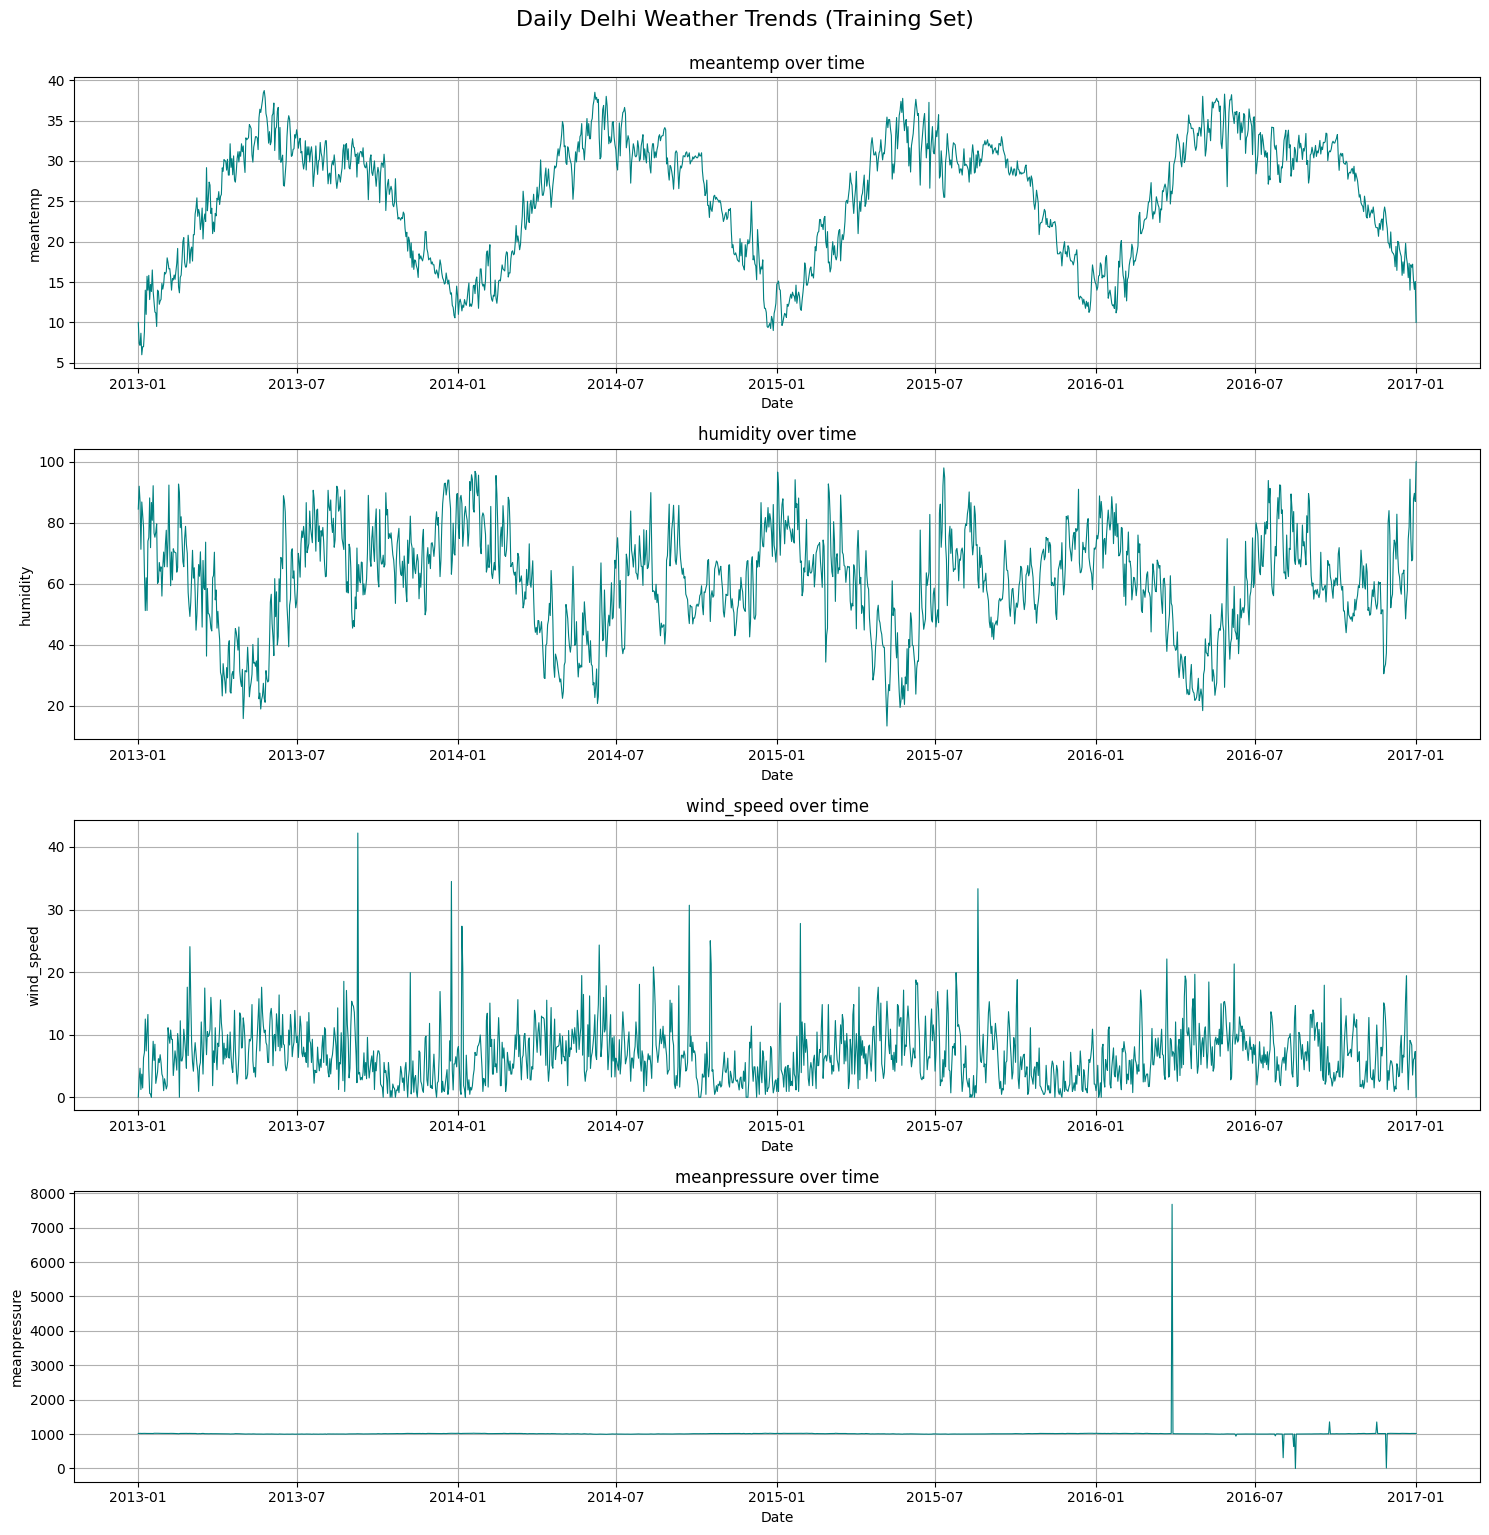

In [2]:
# Define the features to plot
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Plot settings
plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4, 1, i + 1)
    plt.plot(train.index, train[col], color='teal', linewidth=0.8)
    plt.title(f"{col} over time", fontsize=12)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Daily Delhi Weather Trends (Training Set)", fontsize=16, y=1.02)
plt.show()


<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>From the four plots that are above , we can clearly see that the mean pressure possibly has some outliers that are making its line plot to have irregularities. To see this in the next section we will try removing the outliers and then making a new plot of mean pressure</p>
</div>

<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">🔍 Visualizing meanPressure with outliers removed</h1></div>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>In this section we detect and remove outliers in the meanpressure time series using the Interquartile Range (IQR) method. It calculates the 25th (Q1) and 75th (Q3) percentiles to define typical values, then filters out any values that fall significantly outside this range. After cleaning, the filtered data is plotted to show a clearer view of how atmospheric pressure behaves over time without extreme anomalies. This helps in identifying meaningful patterns and seasonal changes in the pressure data more accurately.</p>
</div>

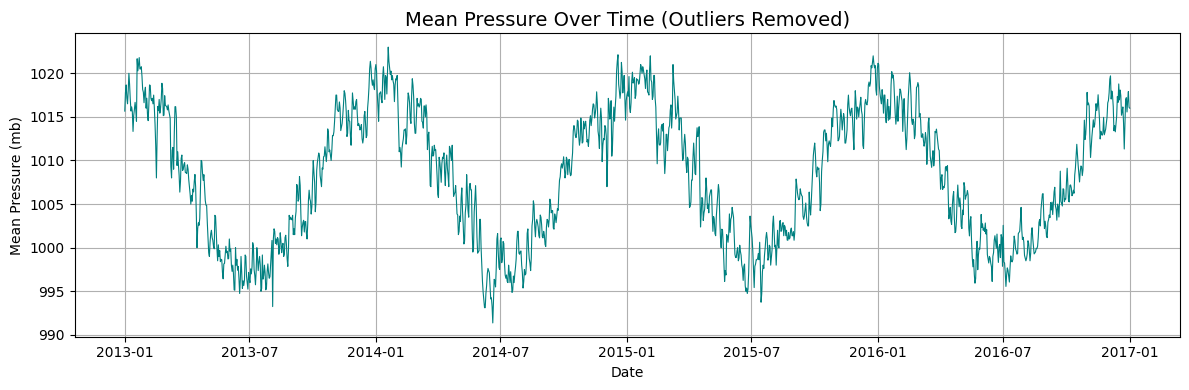

In [3]:
# Calculate Inter Quatile Range(IQR) for meanpressure
Q1 = train['meanpressure'].quantile(0.25)
Q3 = train['meanpressure'].quantile(0.75)
IQR = Q3 - Q1

#  Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Filter out the outliers
filtered_pressure = train[(train['meanpressure'] >= lower_bound) & (train['meanpressure'] <= upper_bound)]

#  Replot the cleaned pressure values
plt.figure(figsize=(12, 4))
plt.plot(filtered_pressure.index, filtered_pressure['meanpressure'], color='teal', linewidth=0.8)
plt.title("Mean Pressure Over Time (Outliers Removed)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Mean Pressure (mb)")
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">🌡️ Trend Analysis </h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<h2 style="color: #2e86c1; margin-top: 0;"> 📉 Smoothing the Data with Rolling Averages</h2>
<p>When working with time series data, daily values often jump up and down due to natural variations or random noise. This can make it hard to clearly see long-term patterns, like whether a variable is slowly increasing or decreasing over time.

To fix this, we use a technique called a rolling average (or moving average). It works by averaging each value with the ones before it (in this case, the past 30 days), which smooths the line and helps us focus on the bigger picture. Below, the red lines show the 30-day rolling average, making it much easier to see trends for temperature, humidity, wind speed, and pressure.</p>

</div>

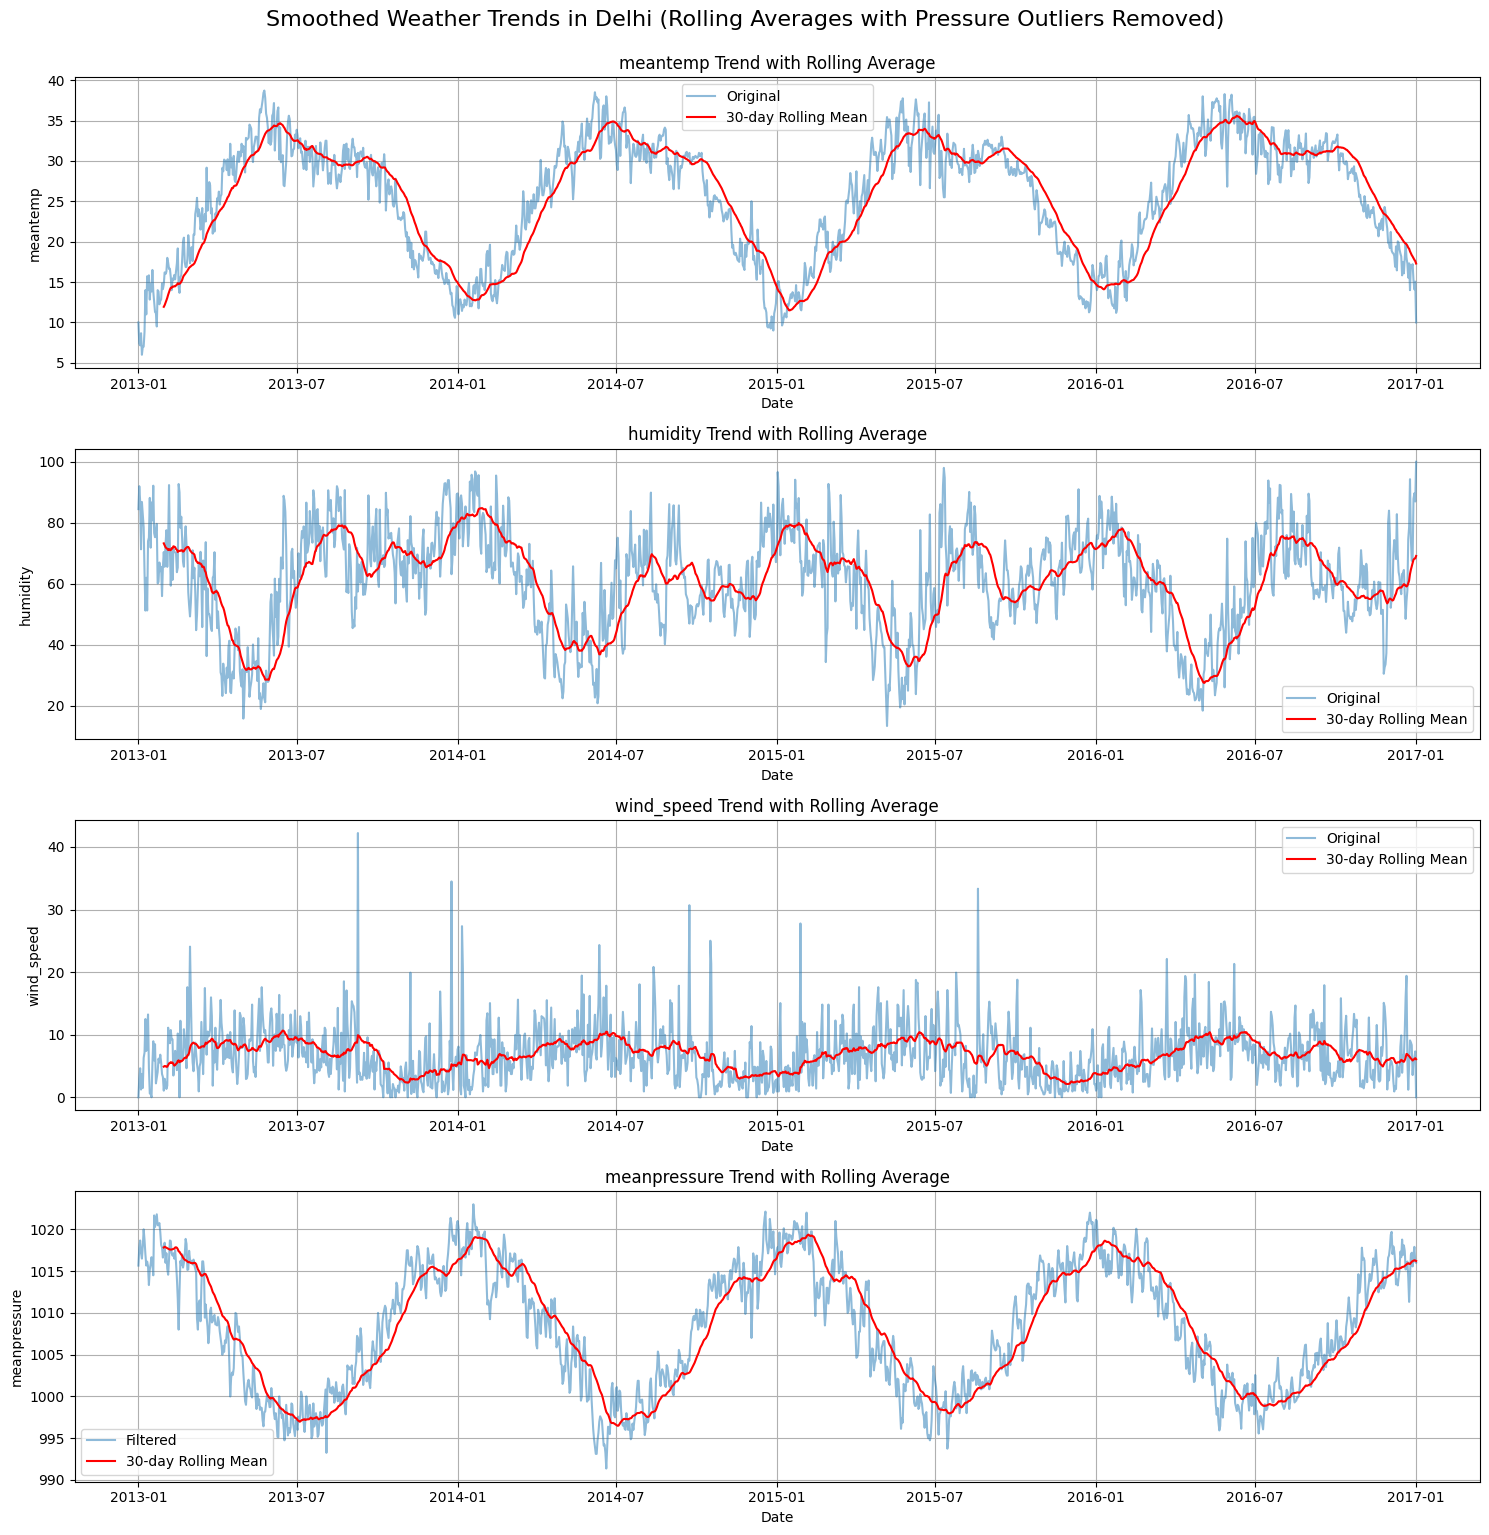

In [4]:
plt.figure(figsize=(15, 15))
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']


for i, col in enumerate(features):
    plt.subplot(4, 1, i + 1)
    
    if col == 'meanpressure':
        plt.plot(filtered_pressure.index, filtered_pressure[col], label='Filtered', alpha=0.5)
        plt.plot(filtered_pressure[col].rolling(window=30).mean(), label='30-day Rolling Mean', color='red')
    else:
        plt.plot(train[col], label='Original', alpha=0.5)
        plt.plot(train[col].rolling(window=30).mean(), label='30-day Rolling Mean', color='red')

    plt.title(f"{col} Trend with Rolling Average", fontsize=12)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Smoothed Weather Trends in Delhi (Rolling Averages with Pressure Outliers Removed)", fontsize=16, y=1.02)
plt.show()


<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;"> 🔍 Understanding Time Series Decomposition </h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<h2 style="color: #2e86c1; margin-top: 0;">🧩 Breaking a Time Series Into Meaningful Parts</h2>
<p>Time series data, like daily temperatures, often blend several patterns into one messy curve. You might see long-term changes, regular seasonal cycles, and random spikes—all happening together.

To better understand this, we use seasonal decomposition, which separates the data into three components:
</p>
<ul>
<li style="margin-bottom: 8px;"><strong>Trend –  </strong>The overall direction the data is moving over a long period.</li>
<li style="margin-bottom: 8px;"><strong>Seasonality –  </strong> The short-term repeating pattern (like hot summers and cold winters).</li>
<li style="margin-bottom: 8px;"><strong>Residuals (Noise) –  </strong> The leftover irregularities that don’t follow any pattern.</li>
</ul>
<p>By isolating these parts, we can study each one more clearly and make better forecasts or insights from the data.</p>

<h2 style="color: #2e86c1; margin-top: 0;">✌️ Two Ways to Decompose a Time Series</h2>
<p>When breaking down a time series, we typically use one of two models—additive or multiplicative—depending on how the components behave over time.</p>
<ol>
<li style="margin-bottom: 8px;"><strong>Additive Model –  </strong>In this model, we assume the overall data is a simple sum of its parts represented as <strong>Data = Trend + Seasonality + Residual. </strong>It’s used when the seasonal pattern stays the same in size, regardless of whether the trend is increasing or decreasing. For instance, if temperatures always rise by about 5°C every summer, no matter how warm the year is overall, an additive model is a good fit.</p</li>
<li style="margin-bottom: 8px;"><strong>Multiplicative Model –  </strong>
Here, the data is formed by multiplying the components together represented as <strong>Data = Trend × Seasonality × Residual </strong>This model is best when the seasonal effect scales with the trend. For example, if summer causes a 15% increase in temperature, then hotter years show a larger seasonal rise, and cooler years a smaller one.</li>
</ol>
</div>

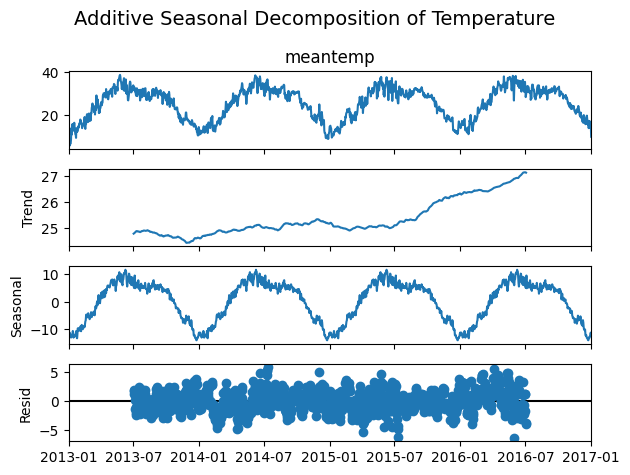

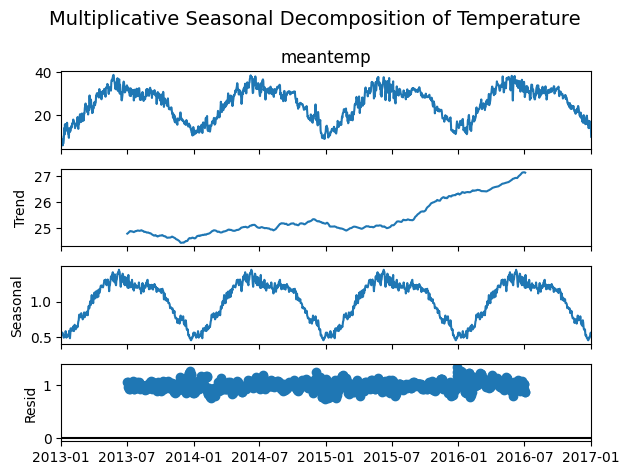

In [5]:
temp_daily = train['meantemp']

#  Perform decomposition
additive_result = seasonal_decompose(temp_daily, model='additive', period=365)
multiplicative_result = seasonal_decompose(temp_daily, model='multiplicative', period=365)

#  Plot Additive decomposition
fig1 = additive_result.plot()
fig1.suptitle('Additive Seasonal Decomposition of Temperature', fontsize=14)
plt.tight_layout()
plt.show()

#  Plot Multiplicative decomposition
fig2 = multiplicative_result.plot()
fig2.suptitle('Multiplicative Seasonal Decomposition of Temperature', fontsize=14)
plt.tight_layout()
plt.show()



<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">
<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;"> 🔁 Autocorrelation & Partial Autocorrelation</h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">

<h3 style="color: #2e86c1;">Understanding How Past Values Influence the Present</h3>

<p>In time series data, what happens today is often influenced by what happened in the past. For example, if it was hot yesterday, there's a good chance today might be hot too. This is called <strong>autocorrelation</strong>—a key concept in time series modeling.</p>

<h3 style="color: #2e86c1; margin-top: 0;">📌 What is Autocorrelation?</h3>

<p>Autocorrelation measures how closely current values relate to past values in a time series. It works by comparing the original data with lagged versions of itself - essentially checking if there's a pattern between today's value and values from days or weeks ago.</p>


<p><strong>Example Interpretation:</strong><br>
If we see strong autocorrelation at lag 1, it means yesterday's temperature is a good predictor of today's temperature. If we see it at lag 7, there might be a weekly pattern where similar temperatures occur exactly one week apart.</p>


<p>High autocorrelation at specific lags helps us identify repeating cycles in our data. Near-zero autocorrelation suggests the values are essentially random with no relationship to past values.</p>

<h3 style="color: #2e86c1; margin-top: 0;">🤔 What is Partial Autocorrelation?</h3>

<p>Partial autocorrelation goes a step further by measuring the direct relationship between current and past values, while removing the influence of all the intermediate lags.</p>


<p><strong>Key Difference:</strong><br>
While regular autocorrelation might show a relationship between today and 3 days ago because of day-to-day connections, partial autocorrelation tells us if there's a direct link between today and 3 days ago that isn't just due to the chain of days in between.</p>

<p>This is particularly useful when building ARIMA models, as it helps determine how many past values we should include in our autoregressive terms.</p>

<h3 style="color: #2e86c1; margin-top: 0;">📈 Visualizing with ACF and PACF Plots</h3>

<p>We use two special plots to examine these relationships:</p>

<p><strong>ACF (Autocorrelation Function) Plot:</strong><br>
Shows the correlation between the series and its lags. The vertical lines represent the strength of correlation at each lag time. If lines extend beyond the blue confidence interval, those lags are statistically significant.</p>

<p><strong>PACF (Partial Autocorrelation Function) Plot:</strong><br>
Similar to ACF but only shows direct relationships. The pattern here helps us identify how many autoregressive terms we might need in our models.</p>
</div>



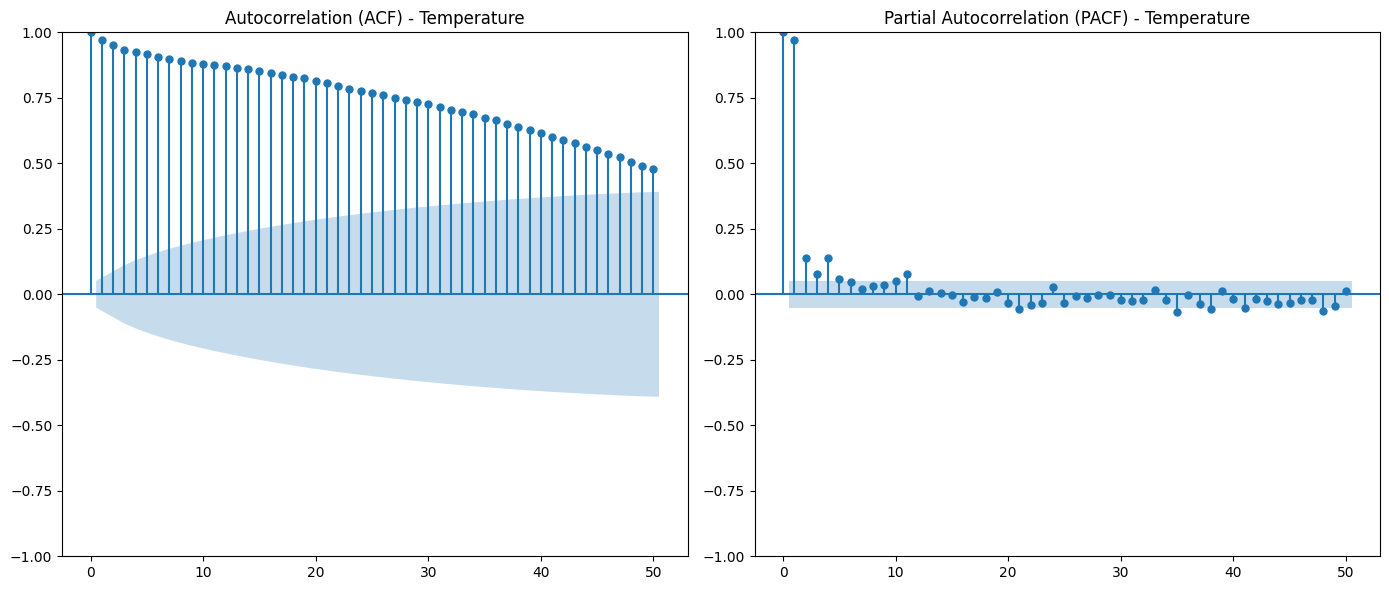

In [6]:
# Select daily temperature
temp_series = train['meantemp']

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(temp_series.dropna(), lags=50, ax=plt.gca(), title='Autocorrelation (ACF) - Temperature')

plt.subplot(1, 2, 2)
plot_pacf(temp_series.dropna(), lags=50, ax=plt.gca(), title='Partial Autocorrelation (PACF) - Temperature', method='ywm')

plt.tight_layout()
plt.show()

<div style="font-family: Arial, sans-serif;  margin: 0 auto; color: #333;">

<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;"> 📏 Stationarity in Time Series</h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">

<h3 style="color: #2e86c1;">Why Stability Matters Before Forecasting</h3>

<p>In time series analysis, many forecasting models (like AR, ARIMA, SARIMA) assume that the data is <strong>stationary</strong>. But what does that mean?</p>


<h3 style="color: #2e86c1; margin-top: 0;">🧠 What Is Stationarity?</h3>

<p>A time series is <strong>stationary</strong> when its fundamental statistical properties remain constant over time. This stability is crucial because it means the patterns we observe aren't changing as time progresses.</p>


<p><strong>Three Key Requirements:</strong><br>
1. <strong>Constant Mean</strong>: The average value doesn't trend up or down<br>
2. <strong>Constant Variance</strong>: The spread of values stays consistent<br>
3. <strong>Constant Autocorrelation</strong>: Relationships between points don't change</p>


<p>Imagine looking at temperature data where summer months are always warmer than winter months, but the <em>average difference</em> between seasons stays the same year after year - that's the kind of stability we're looking for.</p>



<h3 style="color: #2e86c1; margin-top: 0;">📉 Why Is Stationarity Important?</h3>

<p>Most time series models are built on mathematical assumptions that require stationarity. When data violates these assumptions, we encounter serious problems:</p>

<ul>
<li><strong>Unreliable forecasts</strong>: Predictions may systematically over- or under-estimate future values</li>
<li><strong>Misleading patterns</strong>: The model might detect trends that are really just temporary fluctuations</li>
<li><strong>Incorrect confidence intervals</strong>: Our uncertainty estimates become untrustworthy</li>
</ul>

<p>This is why we always check for stationarity before building models - it's like checking the foundation before building a house.</p>

<h3 style="color: #2e86c1; margin-top: 0;">🔎 How to Check Stationarity</h3>

<p>We use two complementary approaches to test for stationarity:</p>

<p><strong>1. Visual Inspection</strong><br>
We'll plot rolling statistics (mean and standard deviation) over time. If these lines remain roughly horizontal, it suggests stationarity.</p>

<p><strong>2. Dickey-Fuller Test</strong><br>
This statistical test gives us a p-value that objectively measures stationarity. A p-value below 0.05 indicates we can reject the null hypothesis of non-stationarity.</p>

</div>



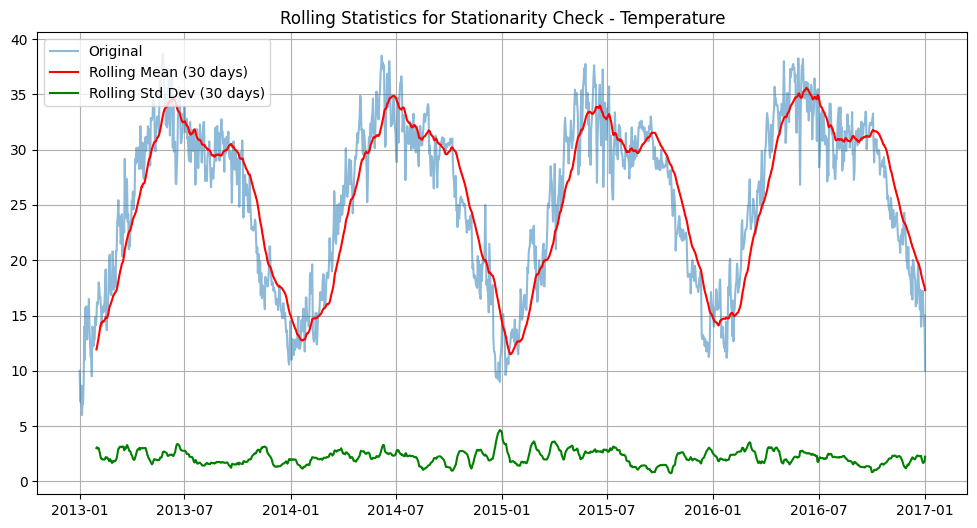

ADF Statistic: -2.021069055920669
p-value: 0.277412137230162
Critical Value (1%): -3.4348647527922824
Critical Value (5%): -2.863533960720434
Critical Value (10%): -2.567831568508802


In [7]:
# Get daily mean temperature
temp_series = train['meantemp']

# Plot rolling mean and std deviation
rolling_mean = temp_series.rolling(window=30).mean()
rolling_std = temp_series.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(temp_series, label='Original', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Statistics for Stationarity Check - Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Run Dickey-Fuller Test
result = adfuller(temp_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>From the results of the ADF test above we can see that: </p>
<ol>
    <li>The p-value (0.277) is greater than 0.05, which means we fail to reject the null hypothesis of the test.  
   <strong>⛔️ Therefore, the time series is not stationary.</strong></li>
    <li>The ADF Statistic (-2.02) is less negative than all the critical values at 1%, 5%, and 10%. This again confirms that the series shows significant signs of non-stationarity</li>
</ol>
</div>

<div style="font-family: Arial, sans-serif; margin: 0 auto; color: #333;">
<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;"> 🔧 How to Make a Time Series Stationary</h1>

<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">

<h3 style="color: #2e86c1;">Transforming the Data to Remove Trend & Seasonality</h3>

<p>When we discover our time series is <strong>non-stationary</strong>, we need to transform it to stabilize its statistical properties before modeling. This process helps uncover the true underlying patterns by removing distracting trends and seasonal effects.</p>

<h3 style="color: #2e86c1; margin-top: 0;">📌 Common Transformation Techniques</h3>

<p>There are several powerful methods to achieve stationarity, each addressing different aspects of non-stationarity:</p>

<p><strong>1. Differencing</strong><br>
Subtracts each value from its immediate predecessor (value<sub>t</sub> - value<sub>t-1</sub>). This effectively removes linear trends by focusing on changes between consecutive observations rather than absolute values.</p>

<p><strong>2. Seasonal Differencing</strong><br>
Subtracts values from the same period in previous cycles (value<sub>t</sub> - value<sub>t-m</sub> where m is the seasonal period). For monthly data with yearly seasonality, m=12.</p>

<p><strong>3. Log Transformation</strong><br>
Applies the natural logarithm to compress large values and stabilize variance that grows with the mean. Particularly useful for exponential growth patterns.</p>

<p><strong>4. Combined Approaches</strong><br>
Often the most effective solution, like applying log transform first (to handle variance), then differencing (to remove trend).</p>

<p>The right technique depends on your specific data characteristics, which we can identify through visual inspection and statistical tests.</p>

<h3 style="color: #2e86c1; margin-top: 0;">✨ First-Order Differencing in Action</h3>

<p>Let's implement the <strong>most fundamental technique</strong> - first-order differencing. This method works by calculating the difference between consecutive observations:</p>

<p><strong>Mathematically:</strong><br>differenced_series[t] = original_series[t] - original_series[t-1]</p>
</div>



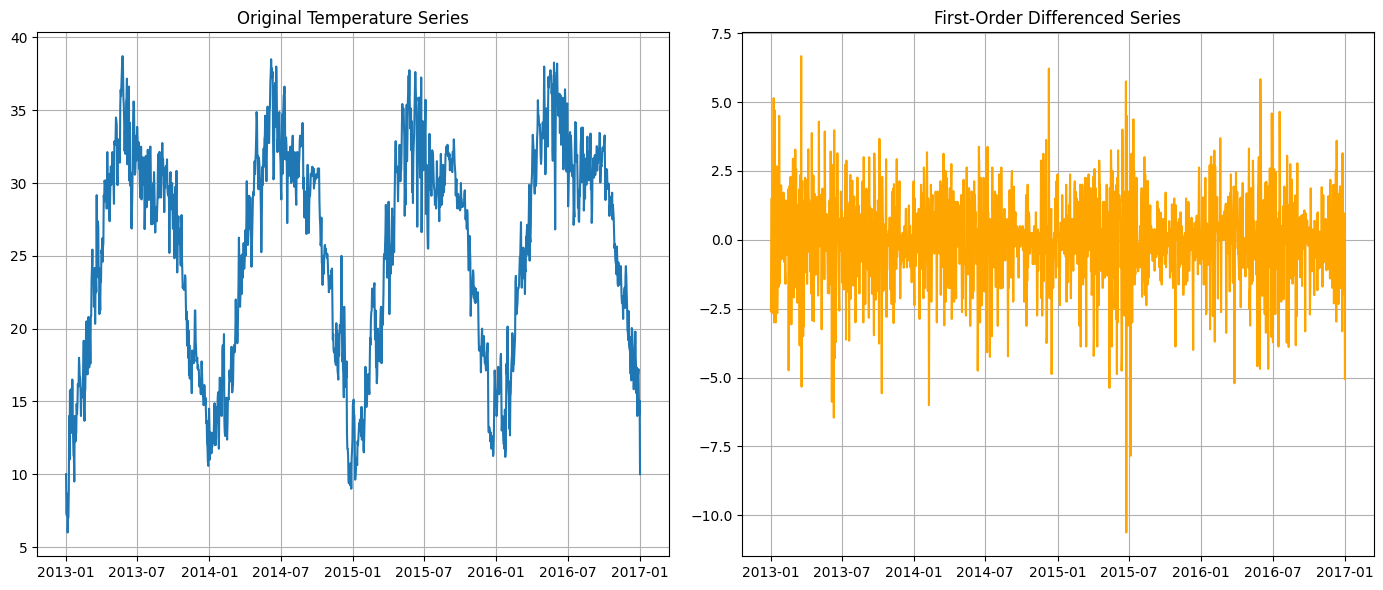

ADF Statistic (Differenced): -16.378720267074694
p-value: 2.7648631375945265e-29
Critical Value (1%): -3.4348647527922824
Critical Value (5%): -2.863533960720434
Critical Value (10%): -2.567831568508802


In [8]:
# First-order differencing
temp_diff = temp_series.diff().dropna()

# Plot original vs differenced
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(temp_series, label='Original')
plt.title('Original Temperature Series')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(temp_diff, color='orange', label='1st Differenced')
plt.title('First-Order Differenced Series')
plt.grid(True)

plt.tight_layout()
plt.show()


# ADF Test on Differenced Series
result = adfuller(temp_diff)
print("ADF Statistic (Differenced):", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


<div style="background-color: #f8f9f9; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<p>After applying first-order differencing to the original temperature series (subtracting each value from the one before it), we now see that the ADF results means the following: </p>
<ol>
    <li> The p-value is extremely small (`2.76e-29`), far below the standard threshold of `0.05`.  
    <strong>✅ This means we can confidently reject the null hypothesis of the test. </strong></li>
    <li>The ADF Statistic (-16.379) is much lower (more negative) than all the critical values.  
   <strong>✅ This further confirms that the differenced series is now stationary.</strong></li>
</ol>
</div>